<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Extraindo_Tweets_com_Python_Atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo Tweets com Python (versão antiga)

In [ ]:
from IPython.display import YouTubeVideo

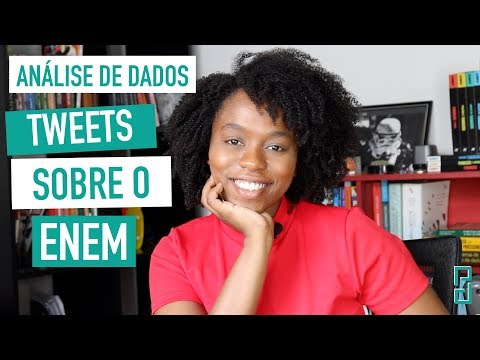

In [ ]:
display(YouTubeVideo('RssGfmtyn4A', width=550, height=310))

# Extraindo Tweets com Python (versão nova)

In [2]:
!pip install snscrape

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [4]:
maxTweets = 100
i = 0
tweets_list = []
for tweet in sntwitter.TwitterSearchScraper('Bolsonaro since:2022-7-27 until:2022-7-31').get_items():
  if i > maxTweets:
    break
  tweets_list.append([tweet.date, tweet.url, tweet.username, tweet.content])
  i = i + 1


<ipython-input-4-0c10e83af88e>:7: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.url, tweet.username, tweet.content])


In [7]:
tweets_df = pd.DataFrame(tweets_list, columns=['date', 'url','username', 'content' ])

In [6]:
tweets_df.to_csv()

',date,url,username,content\r\n0,2022-07-30 23:59:59+00:00,https://twitter.com/ejclima/status/1553530878785110018,ejclima,@OGloboPolitica AS FORÇAS ARMADAS PERTECEM AO ESTADO BRASILEIRO E NÃO AO BOLSONARO!!!\r\n1,2022-07-30 23:59:55+00:00,https://twitter.com/SusanaFurquim_/status/1553530862544846849,SusanaFurquim_,"@MarioGuidoFilh4 Lula e Bolsonaro não são opções dignas e o boçal ajudou a desmanchar a única chance que tínhamos de moralização, a Lava Jato. Há alternativas melhores que os dois, inclusive com sérias e boas propostas para o país, não para si mesmo. Eu já escolhi."\r\n2,2022-07-30 23:59:53+00:00,https://twitter.com/StrayBodyPA978/status/1553530852994433024,StrayBodyPA978,@singaIongjunk O bolsonaro\r\n3,2022-07-30 23:59:52+00:00,https://twitter.com/ValcineaDe/status/1553530850389753860,ValcineaDe,@reinaldoazevedo Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarcisio Bolsonaro e Tarci

In [8]:
import csv
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kai-q\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kai-q\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
tweets_df

,date,url,username,content
0,2022-07-30 23:59:59+00:00,https://twitter.com/ejclima/status/15535308787...,ejclima,@OGloboPolitica AS FORÇAS ARMADAS PERTECEM AO ...
1,2022-07-30 23:59:55+00:00,https://twitter.com/SusanaFurquim_/status/1553...,SusanaFurquim_,@MarioGuidoFilh4 Lula e Bolsonaro não são opçõ...
2,2022-07-30 23:59:53+00:00,https://twitter.com/StrayBodyPA978/status/1553...,StrayBodyPA978,@singaIongjunk O bolsonaro
3,2022-07-30 23:59:52+00:00,https://twitter.com/ValcineaDe/status/15535308...,ValcineaDe,@reinaldoazevedo Bolsonaro e Tarcisio Bolsonar...
4,2022-07-30 23:59:52+00:00,https://twitter.com/gererj_gerson/status/15535...,gererj_gerson,@LeilaAlvesAlm @carmelonetobr @jairbolsonaro T...
...,...,...,...,...
96,2022-07-30 23:57:40+00:00,https://twitter.com/2022Brasi/status/155353029...,2022Brasi,@LulaOficial Eleger Jair Messias Bolsonaro #Bo...
97,2022-07-30 23:57:36+00:00,https://twitter.com/JosHGuaxupe/status/1553530...,JosHGuaxupe,"GIovanna Ewbank tem toda razão, racistas merec..."
98,2022-07-30 23:57:36+00:00,https://twitter.com/luiz_suzano/status/1553530...,luiz_suzano,"Adivinha se não é eleitor do @jairbolsonaro , ..."
99,2022-07-30 23:57:36+00:00,https://twitter.com/Chuamorim/status/155353027...,Chuamorim,@hermesalves8 @marcofeliciano @jairbolsonaro Q...


In [11]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', 'O', 'vai', '|', '–','pra', 'a', 'e', '-'])

In [12]:
# stop_words

In [13]:
def remove_stopwords(x):
  word_tokens = nltk.word_tokenize(x)
  # print(word_tokens)
  filtered_sentence = ' '.join([w for w in word_tokens if not (w in stop_words or len(w)<4)]) 
  return filtered_sentence

In [14]:
remove_stopwords('a conversa @ Monark , , Ciro reafirmou pretende')

'conversa Monark Ciro reafirmou pretende'

In [15]:
tweets_df['filtered_text'] = tweets_df['content'].apply(lambda x: remove_stopwords(x))

In [16]:
tweets_df['filtered_text']

0      OGloboPolitica FORÇAS ARMADAS PERTECEM ESTADO ...
1      MarioGuidoFilh4 Lula Bolsonaro opções dignas b...
2                                singaIongjunk bolsonaro
3      reinaldoazevedo Bolsonaro Tarcisio Bolsonaro T...
4      LeilaAlvesAlm carmelonetobr jairbolsonaro Tamb...
                             ...                        
96     LulaOficial Eleger Jair Messias Bolsonaro Bols...
97     GIovanna Ewbank toda razão racistas merecem ra...
98     Adivinha eleitor jairbolsonaro adivinha //t.co...
99      hermesalves8 marcofeliciano jairbolsonaro feitos
100    HugoQueiroz_ miriamleitao Calma nunca passou m...
Name: filtered_text, Length: 101, dtype: object

In [17]:
pd.Series(' '.join(tweets_df['filtered_text'].str.lower()).split()).value_counts()[:20]

bolsonaro          75
jairbolsonaro      41
lula               15
brasil             14
tarcisio           12
presidente          9
país                9
povo                8
lulaoficial         8
turno               8
governo             7
bolsonarosp         7
tarcisiogdf         7
flaviobolsonaro     6
brasileiro          6
assim               5
deus                5
mais                5
sobre               5
milhões             5
dtype: int64